In [1]:
import numpy as np
from src.denselayer import DenseLayer
from src.model import Model
from src.optimizers import gradient_descent
from src.utils import one_hot_enc
from src.utils import generate_batches

In [2]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [3]:
# Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

data = loadmat("data/mnist.mat")                 
X = data["X"]                               
Y = one_hot_enc(data["y"]-1)
del data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4500, 400) (4500, 10)
(500, 400) (500, 10)


# Mine

In [5]:
layers = [
    DenseLayer(nodes_prev=400,  nodes_curr=400, activation="sigmoid"),
    DenseLayer(nodes_prev=400, nodes_curr=25, activation="sigmoid"),
    DenseLayer(nodes_prev=25, nodes_curr=10, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent
)

In [6]:
history = model.fit(X_train, y_train, epoch=50, lr=0.01, bs=10)

Iteration: 1	 cost: 2.29670	accuracy: 11.51%
Iteration: 10	 cost: 1.67092	accuracy: 64.31%
Iteration: 20	 cost: 0.79363	accuracy: 81.56%
Iteration: 30	 cost: 0.53347	accuracy: 87.09%
Iteration: 40	 cost: 0.42108	accuracy: 89.38%
Iteration: 50	 cost: 0.36090	accuracy: 90.49%


In [7]:
from src.metrics import accuracy_categ_ce
accuracy_categ_ce(y_test, model.predict(X_test))

0.896

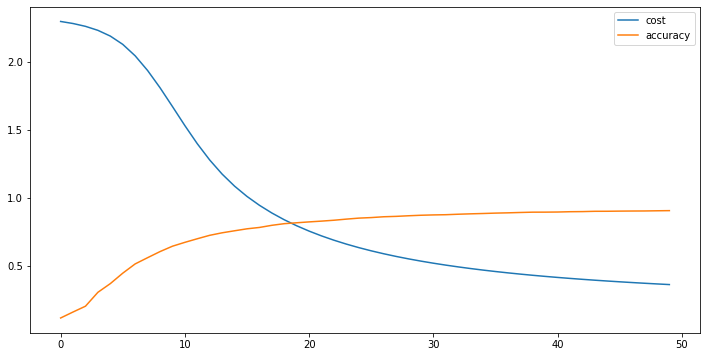

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
plt.plot(history)
plt.legend(['cost', 'accuracy'])
plt.show()

# Keras

In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(400, input_shape=(400,)))
model.add(Activation('sigmoid'))                            

model.add(Dense(25))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train, epochs=20, verbose = 2)

Epoch 1/20
141/141 - 0s - loss: 1.8217 - accuracy: 0.5309
Epoch 2/20
141/141 - 0s - loss: 1.0047 - accuracy: 0.8347
Epoch 3/20
141/141 - 0s - loss: 0.6757 - accuracy: 0.8822
Epoch 4/20
141/141 - 0s - loss: 0.5143 - accuracy: 0.8958
Epoch 5/20
141/141 - 0s - loss: 0.4243 - accuracy: 0.9116
Epoch 6/20
141/141 - 0s - loss: 0.3636 - accuracy: 0.9207
Epoch 7/20
141/141 - 0s - loss: 0.3226 - accuracy: 0.9291
Epoch 8/20
141/141 - 0s - loss: 0.2890 - accuracy: 0.9316
Epoch 9/20
141/141 - 0s - loss: 0.2660 - accuracy: 0.9364
Epoch 10/20
141/141 - 0s - loss: 0.2421 - accuracy: 0.9424
Epoch 11/20
141/141 - 0s - loss: 0.2250 - accuracy: 0.9444
Epoch 12/20
141/141 - 0s - loss: 0.2078 - accuracy: 0.9487
Epoch 13/20
141/141 - 0s - loss: 0.1920 - accuracy: 0.9518
Epoch 14/20
141/141 - 0s - loss: 0.1789 - accuracy: 0.9582
Epoch 15/20
141/141 - 0s - loss: 0.1671 - accuracy: 0.9600
Epoch 16/20
141/141 - 0s - loss: 0.1561 - accuracy: 0.9616
Epoch 17/20
141/141 - 0s - loss: 0.1450 - accuracy: 0.9658
Epoch 

In [12]:
from src.metrics import accuracy_categ_ce
accuracy_categ_ce(y_test, model.predict(X_test))

0.928

In [13]:
model.evaluate(x=X_test, y=y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.9280


[0.2624170482158661, 0.9279999732971191]